In [1]:
import tensorflow as tf
import keras 
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import (
    Reshape, Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization)
from keras.models import Model , Sequential

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
keras.__version__

'2.8.0'

### Pre-processing

In [4]:
(X_train_ori, y_train_ori), (X_test_ori, y_test_ori)=tf.keras.datasets.mnist.load_data()

In [5]:
X_train_norm, X_test_norm= X_train_ori/255.0 , X_test_ori/255.0
print("X_train's shape {}, X_test's shape {}".format(
    X_train_norm.shape, X_test_ori.shape))

X_train's shape (60000, 28, 28), X_test's shape (10000, 28, 28)


Xem một ảnh trong dataset: 

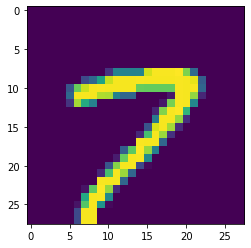

In [6]:
plt.imshow(X_train_ori[123])
plt.show()

Xem label của ảnh

In [7]:
print("label của ảnh phía trên là:", y_train_ori[123])

label của ảnh phía trên là: 7


###  Train Test Split

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_norm, y_train_ori, test_size=0.1)  

### Model example

In [9]:
X_test, y_test = X_test_norm, y_test_ori 

**CÂU 1: Training một mạng neural net cho tập MNIST theo config đề cho:**

In [10]:
inputs = Input(shape=(28,28)) 
print("input shape", inputs.shape)
inputs_reshaped = Reshape((28,28,1))(inputs) 
print("inputs_reshaped shape", inputs_reshaped.shape) 
X=Flatten()(inputs_reshaped)
print("flatten shape: ", X.shape)
X=Dense(units=200, activation="relu")(X)
X=Dense(units=100, activation="relu")(X)
X=Dense(units=50, activation="relu")(X)
X=Dense(units=20, activation="relu")(X) 
softmax=Dense(units=10, activation="softmax")(X) 
model=Model(inputs, softmax, name='model_1')

# compile model:
    # - optimzer: adam 
    # - loss function: sparse_categorical_crossentropy 
    # - metrics: accuracy trên top1 

model.compile(optimizer='adam', 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=["accuracy"]
              )
model.summary()

input shape (None, 28, 28)
inputs_reshaped shape (None, 28, 28, 1)
flatten shape:  (None, 784)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                              

- Training

In [11]:
model_fit=model.fit(
    X_train, 
    y_train.reshape(-1,1),
    batch_size=200, 
    epochs=10, 
    validation_data=(X_valid,y_valid)
    ) 
model.save_weights("first_model.h5")

Epoch 1/10
270/270 [==============================] - 6s 17ms/step - loss: 0.4239 - accuracy: 0.8731 - val_loss: 0.1763 - val_accuracy: 0.9505
Epoch 2/10
270/270 [==============================] - 4s 16ms/step - loss: 0.1404 - accuracy: 0.9596 - val_loss: 0.1407 - val_accuracy: 0.9603
Epoch 3/10
270/270 [==============================] - 4s 16ms/step - loss: 0.0945 - accuracy: 0.9717 - val_loss: 0.1123 - val_accuracy: 0.9668
Epoch 4/10
270/270 [==============================] - 4s 15ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0963 - val_accuracy: 0.9708
Epoch 5/10
270/270 [==============================] - 3s 12ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0860 - val_accuracy: 0.9742
Epoch 6/10
270/270 [==============================] - 2s 9ms/step - loss: 0.0412 - accuracy: 0.9875 - val_loss: 0.0899 - val_accuracy: 0.9715
Epoch 7/10
270/270 [==============================] - 3s 9ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 0.0959 - val_accuracy: 0.9733
E

- Testing

In [12]:
model.load_weights("first_model.h5")

## Đánh giá model trên tập test
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc) 

313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9789
Loss trên tập test:  0.08336787670850754  Accuracy trên tập test:  0.9789000153541565


**CÂU 3: Cách số param# trong câu 1** 

Các Lớp Dense Layer có số param như sau: 
(n + 1)* m 
- n: kích thước input (chiều dài của vector input)
- m: số unit trong fully connected layer (và cũng bằng size của vector output)  

Input Shape|Output Shape|Số Param 
-----------|------------| ------ 
(None, 784)|(None, 200) |(784+1)*200=157000
(None, 200)|(None, 100) |(200+1)*100=20100
(None, 100)|(None, 50)  |(100+1)*50=5050
(None, 50) |(None, 20)  |(50+1)*20=1020
(None, 20) |(None, 10)  |(20+1)*10=210



**CÂU 4:**  Cấu trúc ở câu 1 có thể được áp dụng cho bài toán regression, nhưng ta cần: 
- Thay đổi cấu trúc lớp cuối thay vì fully connected layer (linear function + activation function) thì chỉ dùng liear function nhưng không dùng activation function.
- Thay bằng hàm loss khác dùng cho mô hình Regression như RMSE. 

**CÂU 4: Training một mạng neural net cho tập MNIST theo config đề cho:**  

In [13]:
inputs = Input(shape=(28,28)) 
print("input shape", inputs.shape)
inputs_reshaped = Reshape((28,28,1))(inputs) 
print("inputs_reshaped shape", inputs_reshaped.shape) 
X = Conv2D(20, [5, 5], strides = [1, 1], padding = 'same')(inputs_reshaped)
X = MaxPooling2D((2,2), strides = (2, 2))(X) 
X = Conv2D(20, (5, 5), strides=(1,1))(X)
X = MaxPooling2D((2,2), strides = (2, 2))(X)
X = Flatten()(X)
X=Dense(units=40, activation="relu")(X)      
X=Dense(units=20, activation="relu")(X)
softmax=Dense(units=10, activation="softmax")(X)  
model_2 = Model(inputs,softmax) 
model_2.summary()

input shape (None, 28, 28)
inputs_reshaped shape (None, 28, 28, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 20)        10020     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0    

In [14]:
model_2.compile(optimizer='adam', 
              loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=["accuracy"]
              )
history=model_2.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid)) 

Epoch 1/10
540/540 [==============================] - 52s 96ms/step - loss: 0.3199 - accuracy: 0.9033 - val_loss: 0.1136 - val_accuracy: 0.9658
Epoch 2/10
540/540 [==============================] - 51s 95ms/step - loss: 0.0884 - accuracy: 0.9741 - val_loss: 0.0765 - val_accuracy: 0.9747
Epoch 3/10
540/540 [==============================] - 52s 96ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0677 - val_accuracy: 0.9785
Epoch 4/10
540/540 [==============================] - 51s 94ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 5/10
540/540 [==============================] - 52s 96ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0532 - val_accuracy: 0.9827
Epoch 6/10
540/540 [==============================] - 54s 100ms/step - loss: 0.0346 - accuracy: 0.9892 - val_loss: 0.0484 - val_accuracy: 0.9843
Epoch 7/10
540/540 [==============================] - 51s 94ms/step - loss: 0.0303 - accuracy: 0.9904 - val_loss: 0.0532 - val_accuracy

In [15]:
preds = model_2.evaluate(X_test, y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1])) 

313/313 [==============================] - 4s 12ms/step - loss: 0.0517 - accuracy: 0.9864

Loss = 0.05172465741634369
Test Accuracy = 0.9864000082015991
